In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import defaultdict, Counter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
Rp=pd.read_csv(r'D:\flip WS\Rating Prediction\flpreviews.csv',encoding='latin-1')
Rp.head()

,Unnamed: 0,Review_title,Review_text,Ratings
0,0,Terrific,I am writing this review after using the lapto...,5
1,1,Simply awesome,Delivery : Due to some reasons the delivery go...,5
2,2,Just wow!,"Flipkart, you rock!\nHowever, this is the 1st ...",5
3,3,Fair,Have bought this laptop but performance is ver...,3
4,4,Wonderful,Delivery was on time and nicely packaged. Got ...,4


In [3]:
#dropping the Unnamed: 0 column
Rp.drop('Unnamed: 0', axis =1, inplace = True)

In [4]:
print('shape = >',Rp.shape)

shape = > (15766, 3)


Observation:

There are 15766 rows and 3 columns present in our dataset.

In [5]:
print('Rating counts','\n',Rp.Ratings.value_counts())

Rating counts 
 5    9753
4    3283
1    1253
3    1062
2     415
Name: Ratings, dtype: int64


Observation:

Maximum, 9753 number of ratings present is of 5 star and minimum, 415 is of 2 star.

In [6]:
def plot_labels(Rp, title=None):
  ds_labels = Rp["Ratings"].value_counts(normalize=True)
  ds_labels.sort_index(inplace=True)
  plt.figure(figsize=(4,3))
  ax = ds_labels.plot(kind="bar")
  ax.set_xlabel("Stars")
  ax.set_ylabel("Ratio")
  if title is not None:
    plt.savefig(title + ".eps")
  plt.show()

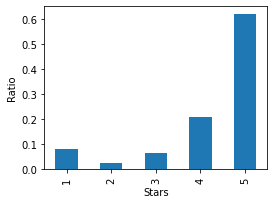

In [7]:
plot_labels(Rp, "stars")

We can observe that the dataset is imbalanced.

In [8]:
Rp['length']=Rp.Review_text.str.len()
Rp.head()

,Review_title,Review_text,Ratings,length
0,Terrific,I am writing this review after using the lapto...,5,361
1,Simply awesome,Delivery : Due to some reasons the delivery go...,5,507
2,Just wow!,"Flipkart, you rock!\nHowever, this is the 1st ...",5,463
3,Fair,Have bought this laptop but performance is ver...,3,386
4,Wonderful,Delivery was on time and nicely packaged. Got ...,4,510


Here we create another column length based on the length of reviews.

In [9]:
Rp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15766 entries, 0 to 15765
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_title  15766 non-null  object
 1   Review_text   15766 non-null  object
 2   Ratings       15766 non-null  int64 
 3   length        15766 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 492.8+ KB


In [10]:
Rp.isnull().sum()

Review_title    0
Review_text     0
Ratings         0
length          0
dtype: int64

<AxesSubplot:>

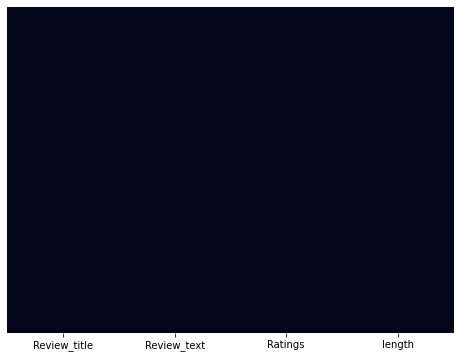

In [11]:
#Visualizing missing values if any through heatmap
plt.figure(figsize=(8,6))
sns.heatmap(Rp.isnull(),yticklabels=False,cbar=False)

Observation:

Thus we confirm that there are no missing values present in our dataset.

In [12]:
#convert text to lowercase
Rp['Review_text']=Rp['Review_text'].str.lower()

In [13]:
Rp['Review_text']=Rp['Review_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

Rp['Review_text']=Rp['Review_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

Rp['Review_text']=Rp['Review_text'].str.replace(r'£|\$', 'dollers')

Rp['Review_text']=Rp['Review_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

Rp['Review_text']=Rp['Review_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [14]:
#remove punctuation
Rp['Review_text']=Rp['Review_text'].str.replace(r'[^\w\d\s]', ' ')

#replace whitespace between terms with a single space
Rp['Review_text']=Rp['Review_text'].str.replace(r'\s+', ' ')

#Remove leading and trailing whitespace
Rp['Review_text']=Rp['Review_text'].str.replace(r'^\s+|\s+?$', '')

In [15]:
Rp.head()

,Review_title,Review_text,Ratings,length
0,Terrific,i am writing this review after using the lapto...,5,361
1,Simply awesome,delivery due to some reasons the delivery got ...,5,507
2,Just wow!,flipkart you rock however this is the numbrst ...,5,463
3,Fair,have bought this laptop but performance is ver...,3,386
4,Wonderful,delivery was on time and nicely packaged got t...,4,510


In [16]:
#Remove stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

Rp['Review_text'] = Rp['Review_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [17]:
Rp['clean_length'] = Rp.Review_text.str.len()

In [18]:
Rp.head()

,Review_title,Review_text,Ratings,length,clean_length
0,Terrific,writing review using laptop numbr months obser...,5,361,310
1,Simply awesome,delivery due reasons delivery got delayed prod...,5,507,371
2,Just wow!,flipkart rock however numbrst time experienced...,5,463,304
3,Fair,bought laptop performance bad highly utilised ...,3,386,238
4,Wonderful,delivery time nicely packaged got specs specif...,4,510,359


In [19]:
print('original Review length', Rp.length.sum())
print('clean Review length', Rp.clean_length.sum())

original Review length 2134605
clean Review length 1538263


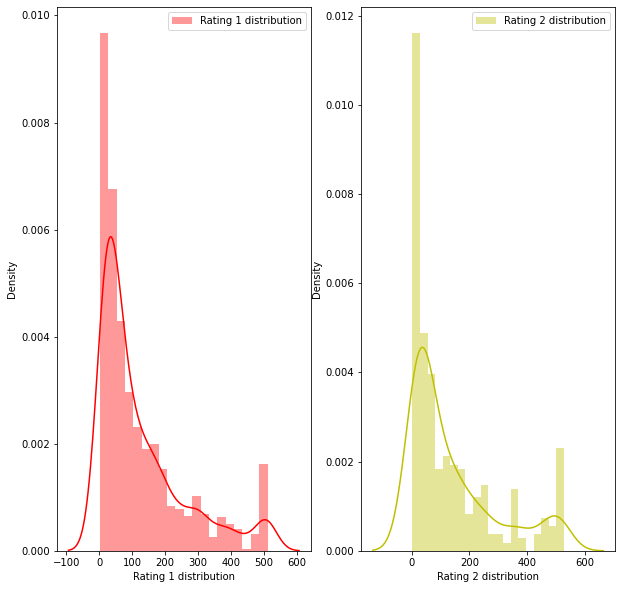

In [20]:
#message distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rp[Rp['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rp[Rp['Ratings']==2]['length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

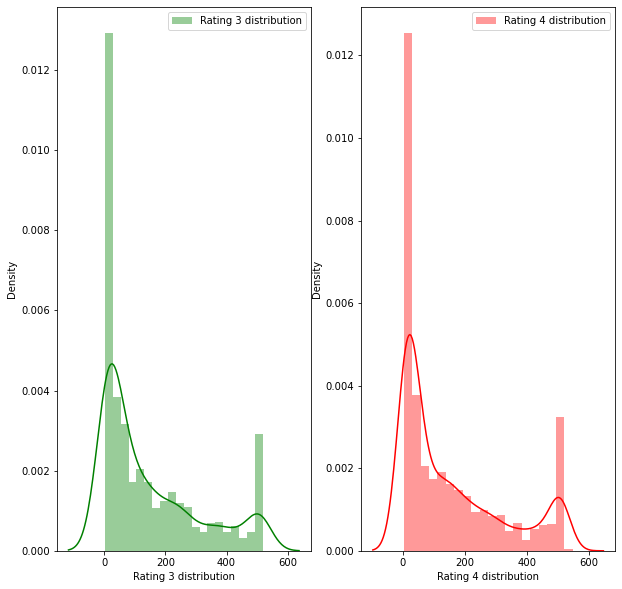

In [21]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rp[Rp['Ratings']==3]['length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='g')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(Rp[Rp['Ratings']==4]['length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='r')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

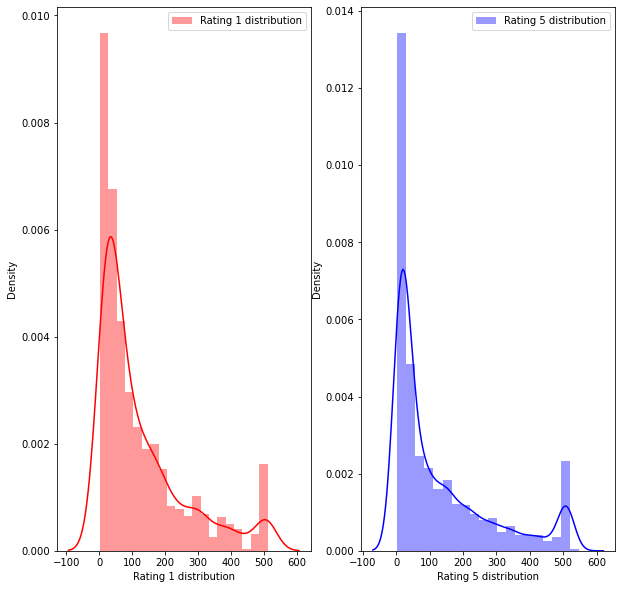

In [22]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rp[Rp['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rp[Rp['Ratings']==5]['length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

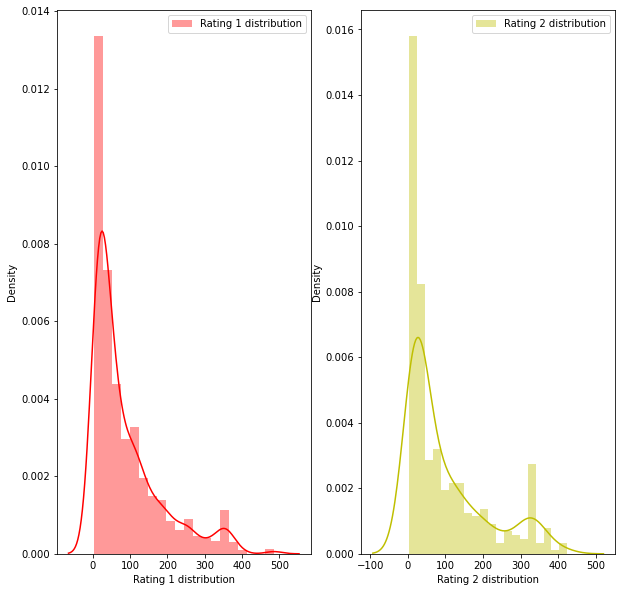

In [23]:
#message distribution after cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rp[Rp['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rp[Rp['Ratings']==2]['clean_length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

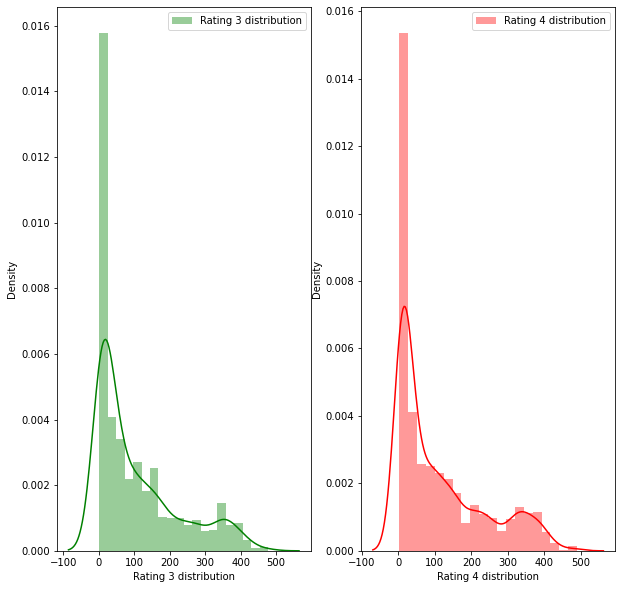

In [24]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rp[Rp['Ratings']==3]['clean_length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='g')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(Rp[Rp['Ratings']==4]['clean_length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='r')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

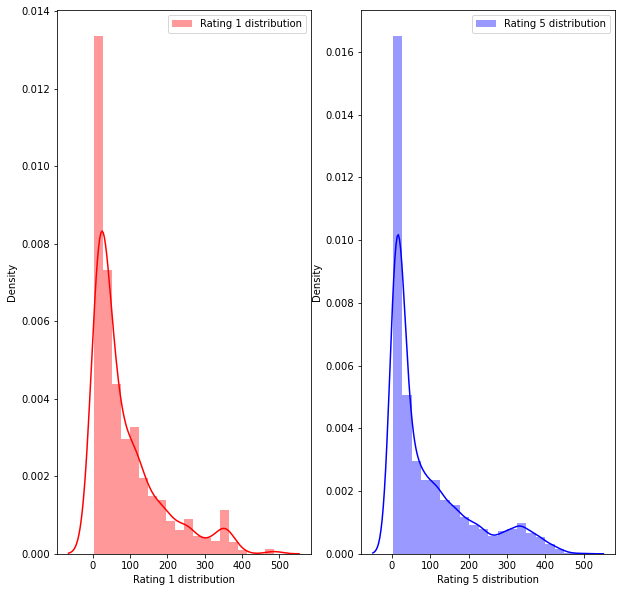

In [25]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rp[Rp['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rp[Rp['Ratings']==5]['clean_length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

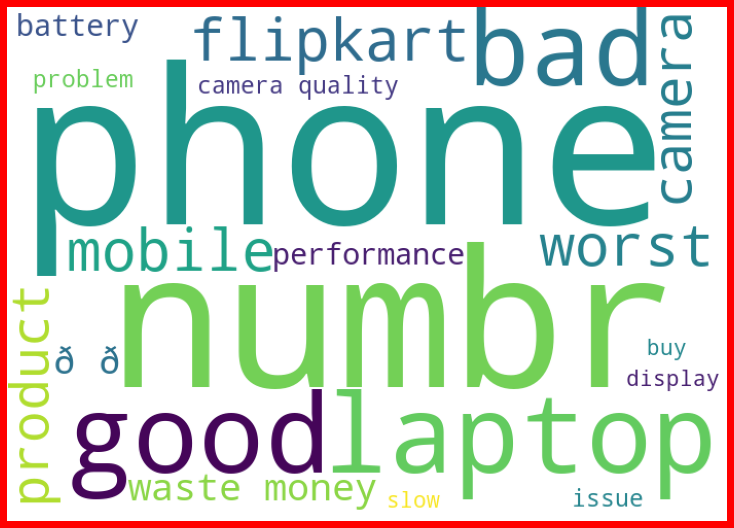

In [26]:
#getting sense of review Loud words in Rating 1
from wordcloud import WordCloud

Rating1=Rp['Review_text'][Rp['Ratings']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [32]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


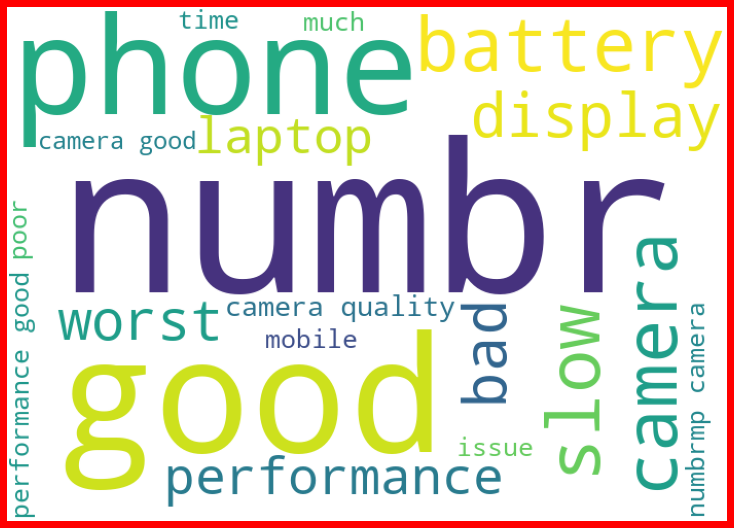

In [27]:
#getting sense of review Loud words in Rating 2

Rating2=Rp['Review_text'][Rp['Ratings']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating2))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

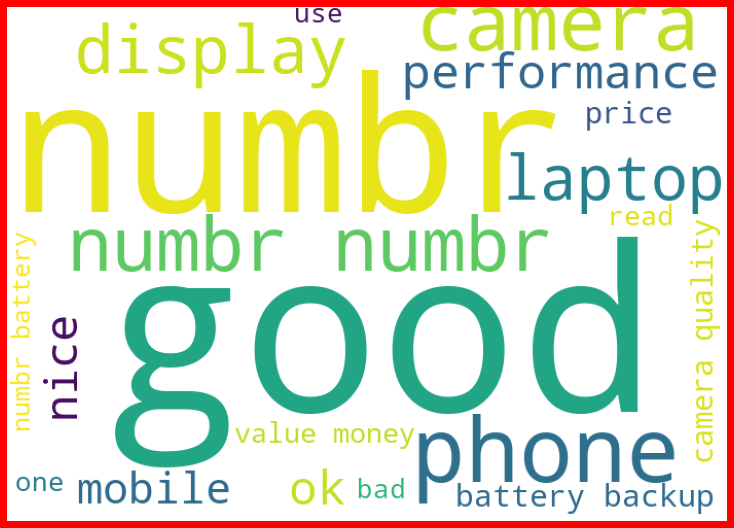

In [28]:
#getting sense of review Loud words in Rating 3

Rating3=Rp['Review_text'][Rp['Ratings']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating3))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

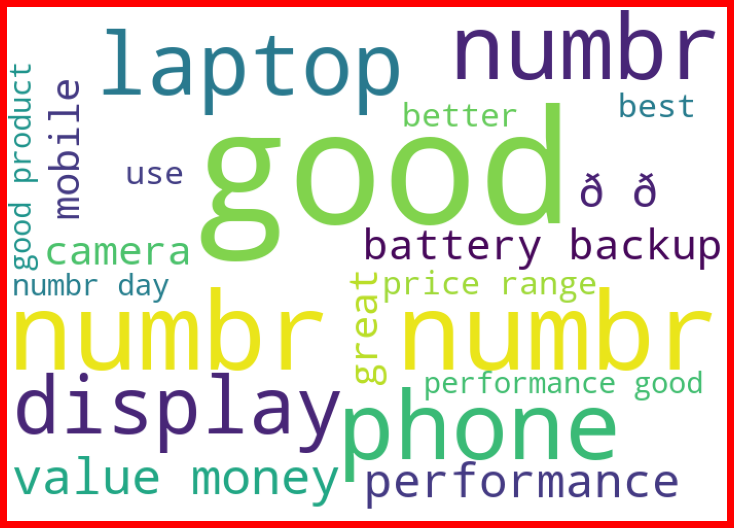

In [29]:
#getting sense of review Loud words in Rating 4

Rating4=Rp['Review_text'][Rp['Ratings']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating4))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

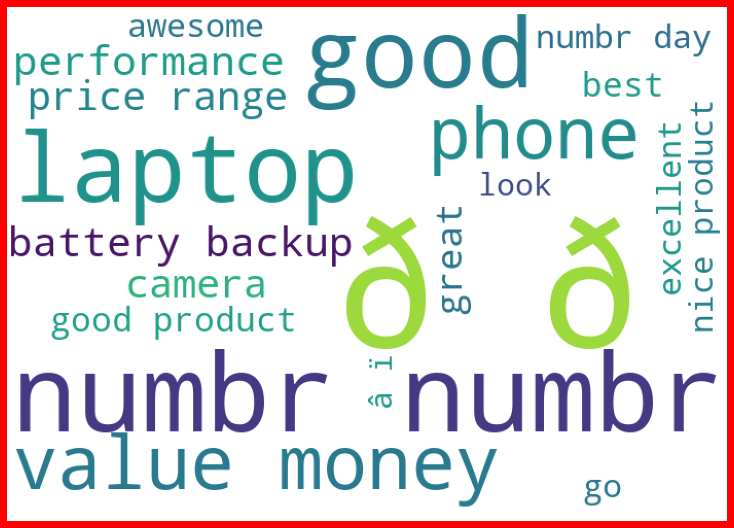

In [30]:
#getting sense of review Loud words in Rating 5

Rating5=Rp['Review_text'][Rp['Ratings']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating5))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec=TfidfVectorizer()
feature1=tf_vec.fit_transform(Rp['Review_text'])

In [32]:
x=feature1
y=Rp['Ratings']

In [33]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=15)

In [34]:
#handling imbalanced data through smote technique
from imblearn.combine import SMOTETomek
from collections import Counter
os=SMOTETomek(sampling_strategy = {1: 20000, 2: 20000, 3: 20000, 4: 20000, 5: 20000})
x_train_ns,y_train_ns=os.fit_sample(x_train,y_train)
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 6828, 4: 2311, 1: 856, 3: 758, 2: 283})
The number of classes after fit Counter({5: 19985, 4: 19957, 1: 19949, 2: 19948, 3: 19921})


In [35]:
#Importing all the model library

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


#Importing Boosting models

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [36]:
KNN=KNeighborsClassifier(n_neighbors=5)
DT=DecisionTreeClassifier(random_state=10)

RF=RandomForestClassifier()
ADA=AdaBoostClassifier()

GBC=GradientBoostingClassifier()


In [37]:
models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('GradientBoostingClassifier', GBC))


****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier()


Accuracy_score =  0.7147991543340381


Cross_Val_Score =  0.633199853346985


classification_report
               precision    recall  f1-score   support

           1       0.85      0.68      0.75       397
           2       0.66      0.70      0.68       132
           3       0.35      0.62      0.45       304
           4       0.57      0.60      0.59       972
           5       0.83      0.77      0.80      2925

    accuracy                           0.71      4730
   macro avg       0.65      0.67      0.65      4730
weighted avg       0.74      0.71      0.72      4730



[[ 269   13   14    6   95]
 [  11   93    5    4   19]
 [   8    7  189   39   61]
 [  10   12   75  586  289]
 [  19   16  256  390 2244]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** DecisionTreeClassifier *****

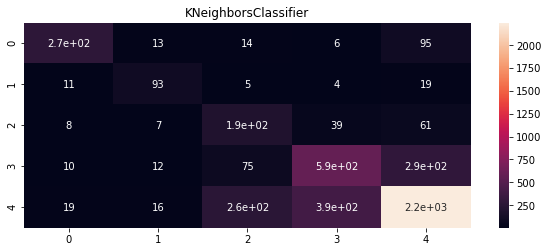

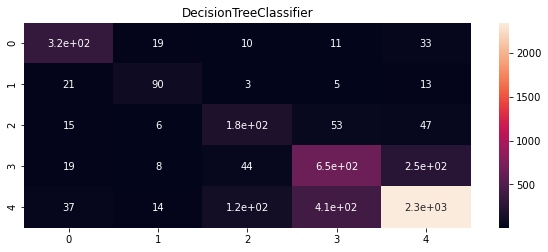

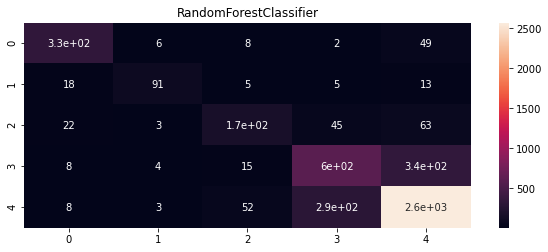

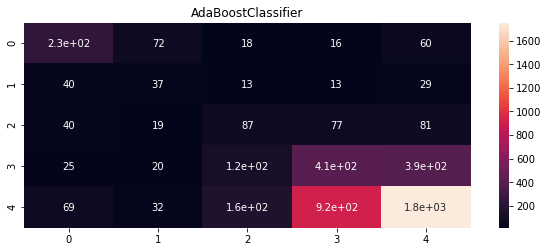

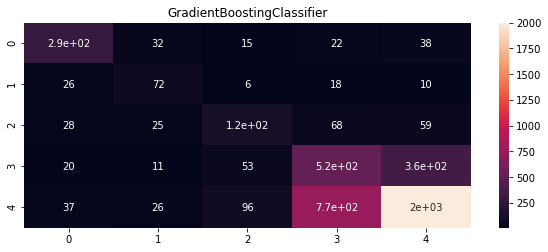

In [38]:
Model= []
score= []
cvs=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train_ns,y_train_ns)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc= cross_val_score(model, x, y, cv=5, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')

In [39]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,71.479915,63.319985
1,DecisionTreeClassifier,75.940803,67.493822
2,RandomForestClassifier,79.682875,72.897684
3,AdaBoostClassifier,53.298097,65.793432
4,GradientBoostingClassifier,63.636364,68.032633


# Using gridsearch cv to find the best parameters in random forest

In [40]:
RFC_param={'bootstrap':[True,False],
          'max_depth':[10,20,30,40,None],
          'max_features':['auto','sqrt'],
          'min_samples_leaf':[1,2,4],
          'min_samples_split':[2,5,10],
          'n_estimators':[5,10,20,30,50],
          }

In [ ]:
from sklearn.model_selection import GridSearchCV

RFC=GridSearchCV(RandomForestClassifier(),RFC_param,cv=10)

RFC.fit(x_train_ns, y_train_ns)

RFC.best_params_

In [ ]:
#RandomForesetClassifier with best parameters

rfc=RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50)
rfc.fit(x_train_ns,y_train_ns)
rfc.score(x_train_ns,y_train_ns)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

In [ ]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

# Random forest classifier is giving us best results so we save it as our final model

In [ ]:
#saving our model

import joblib
joblib.dump(RF,'Rating_prediction.pkl')

In [ ]:
mod=joblib.load('Rating_prediction.pkl')

In [ ]:
#Testing our model
import sys
num= mod.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(num)